In [3]:
# Check pycaret is installed correctly
import pycaret
print(f'PyCaret version: {pycaret.__version__}')

PyCaret version: 2.0.0


In [4]:
from pycaret.datasets import get_data
dataset = get_data('diamond')
dataset.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [5]:
dataset.shape

(6000, 8)

In [6]:
data = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions: (600, 8)


In [7]:
from pycaret.regression import *

exp_reg101 = setup(data = data, target = 'Price')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,6621
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(5400, 8)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [35]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model.Lasso,True
ridge,Ridge Regression,sklearn.linear_model.Ridge,True
en,Elastic Net,sklearn.linear_model.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model.OMP,True
br,Bayesian Ridge,sklearn.linear_model.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model.ARDRegression,False


In [8]:
# Takes approx. 7 minutes to run
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,636.6686,2183903.3412,1432.9080,0.9795,0.0669,0.0490,2.7208
1,Extreme Gradient Boosting,704.2062,2729330.6498,1587.4515,0.9746,0.0737,0.0534,0.5924
2,Extra Trees Regressor,765.6034,2980973.4026,1681.6970,0.9719,0.0820,0.0601,0.9816
3,Random Forest,775.7846,3350117.3998,1764.4708,0.9687,0.0824,0.0598,0.9561
4,Gradient Boosting Regressor,927.7600,3665228.5107,1873.0297,0.9654,0.1034,0.0786,0.3622
5,Light Gradient Boosting Machine,779.8981,3737105.9665,1864.3890,0.9651,0.0796,0.0572,0.1146
6,Decision Tree,1004.3287,5240159.9840,2227.7180,0.9498,0.1081,0.0769,0.0275
7,Lasso Regression,2414.2662,14127010.8262,3733.2789,0.8636,0.6463,0.2866,0.2195
8,Least Angle Regression,2416.2771,14123503.9221,3732.6925,0.8636,0.6518,0.2871,0.0313
9,Lasso Least Angle Regression,2357.4011,14151582.9188,3735.0312,0.8635,0.6361,0.2729,0.0200


In [34]:
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,844.7455,1927322.3012,1388.2803,0.9752,0.0903,0.0722
1,911.3131,3522143.3205,1876.7374,0.9630,0.1082,0.0794
2,1073.4877,6994344.7660,2644.6824,0.9448,0.1058,0.0805
3,788.2540,1983445.8252,1408.3486,0.9779,0.0931,0.0718
4,1037.5351,4389776.8477,2095.1794,0.9593,0.1049,0.0799
5,775.1710,1832912.8196,1353.8511,0.9803,0.0937,0.0727
6,910.8637,2897172.3627,1702.1082,0.9717,0.0998,0.0768
7,896.1185,3257123.3053,1804.7502,0.9709,0.1002,0.0777
8,869.0956,3229328.1886,1797.0332,0.9721,0.0992,0.0732
9,969.9915,3244076.8564,1801.1321,0.9694,0.1031,0.0790


INFO:logs:create_model_container: 8
INFO:logs:master_model_container: 8
INFO:logs:display_container: 13
INFO:logs:<catboost.core.CatBoostRegressor object at 0x7f2a5ace5470>
INFO:logs:tune_model() succesfully completed......................................


INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=<catboost.core.CatBoostRegressor object at 0x7f2a5ace5470>, plot=summary, feature=None, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


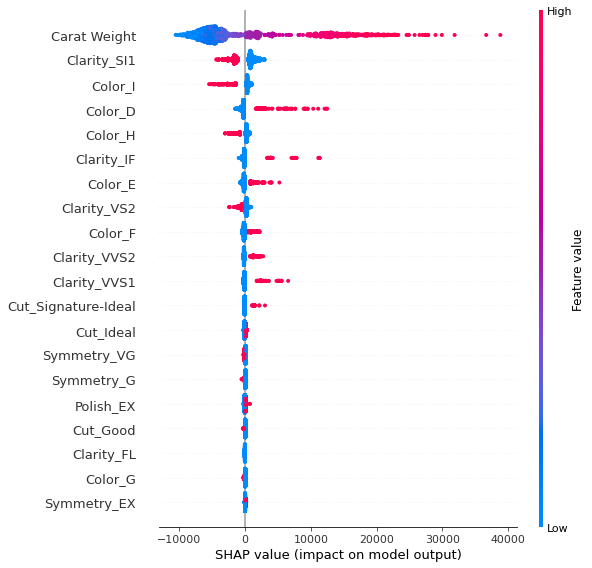

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [38]:
interpret_model(tuned_model)

In [37]:
result = predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,939.9526,2.868564e+06,1693.6835,0.9729,0.0974,0.0764


In [39]:
final_model = finalize_model(tuned_model)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=<catboost.core.CatBoostRegressor object at 0x7f2a5ace5470>)
INFO:logs:Importing libraries
INFO:logs:Getting model name
INFO:logs:Finalizing CatBoost Regressor


In [40]:
result = predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,863.8047,2.193586e+06,1481.0761,0.9793,0.0949,0.0729


In [42]:
result = predict_model(final_model, data=data_unseen)
result.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
index,,,,,,,,,
0,1.21,Ideal,G,VVS1,EX,EX,GIA,11572,10364.5018
1,2.00,Ideal,I,SI1,EX,VG,GIA,16775,14177.6914
2,1.51,Good,F,SI1,VG,G,GIA,10429,10704.2429
3,0.90,Ideal,F,SI1,EX,EX,GIA,4523,4609.5709
4,1.01,Very Good,I,SI1,VG,VG,GIA,4375,4057.4661


In [44]:
from pycaret.utils import check_metric
check_metric(result.Price, result.Label, 'R2')

0.9823

In [47]:
data_unseen

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.21,Ideal,G,VVS1,EX,EX,GIA,11572
1,2.00,Ideal,I,SI1,EX,VG,GIA,16775
2,1.51,Good,F,SI1,VG,G,GIA,10429
3,0.90,Ideal,F,SI1,EX,EX,GIA,4523
4,1.01,Very Good,I,SI1,VG,VG,GIA,4375
...,...,...,...,...,...,...,...,...
595,1.03,Ideal,D,SI1,EX,EX,GIA,6250
596,1.00,Very Good,D,SI1,VG,VG,GIA,5328
597,1.02,Ideal,D,SI1,EX,EX,GIA,6157
598,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206


In [57]:
data_unseen.values

array(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report', 'Price'], dtype=object)

In [65]:
import pandas as pd

carat_weight = 2 # Numeric value
cut = 'Signature-Ideal' # 'Signature-Ideal', 'Ideal', 'Very Good', 'Good', 'Ideal'
color = 'D' # D, E, F - Colorless, G, H, I - Near colorless
clarity = 'F' # F - Flawless, IF - Internally Flawless, VVS1 or VVS2 - Very, Very Slightly Included, or VS1 or VS2 - Very Slightly Included, SI1 - Slightly Included
polish = 'ID' # ID - Ideal, EX - Excellent, VG - Very Good, G - Good
symmetry = 'ID' # ID - Ideal, EX - Excellent, VG - Very Good, G - Good
report = 'GIA' # One of of two values "AGSL" or "GIA" indicating which grading agency reported the qualities of the diamond qualities

new_data = pd.DataFrame(
    [[carat_weight, cut, color, clarity, polish, symmetry, report, 0]],
    columns=data_unseen.columns
)

result = predict_model(final_model, data=new_data)
print(result.Label)

index
0    67836.1297
Name: Label, dtype: float64


Further reading: [Regression Tutorial (REG101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb)